<a href="https://colab.research.google.com/github/swathysathesh/credit-card/blob/main/credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection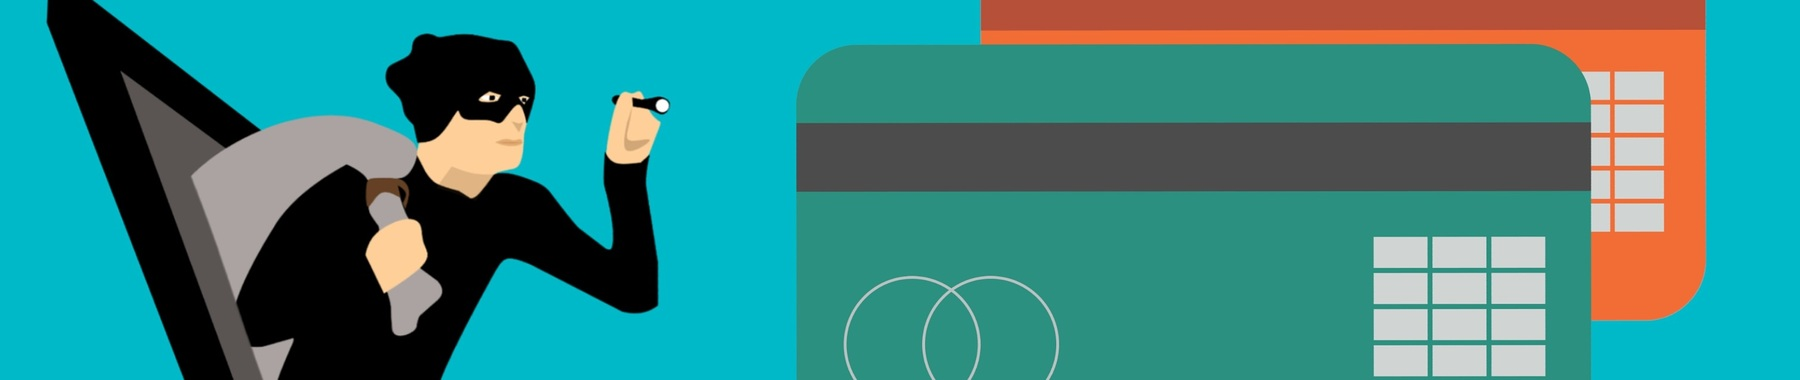**

# Importing Libraries

Importing some packages pandas, NumPy, matplotlib, and seaborn for numerical computations,data preprocessing and data visualization.For doing operations, we have to read data by including a path into read_csv.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/fraudTest[2].csv')
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2.291164e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3.598215e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3.526826e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488364,488364,2020-12-16 20:33:13,4.906629e+18,"fraud_Torp, Muller and Borer",health_fitness,52.40,Charles,Moreno,M,838 Franklin Prairie Apt. 902,...,24.6557,-81.3824,32891.0,Town planner,1987-02-13,64255be8451c29722f47e2f4ffff4f96,1.387226e+09,24.953959,-81.975268,0.0
488365,488365,2020-12-16 20:33:18,3.558882e+15,fraud_Kihn-Schuster,food_dining,123.14,Christopher,Holt,M,05597 Michael Spurs,...,35.2563,-111.9500,759.0,"Geologist, engineering",1957-03-28,4a23e5613274eb1196ea6da129730dce,1.387226e+09,34.847741,-111.625688,0.0
488366,488366,2020-12-16 20:33:41,2.297447e+15,fraud_Schmidt-Larkin,home,15.05,Laura,Walker,F,611 Michael Rue,...,39.9972,-88.6962,478.0,Landscape architect,1960-01-13,f6940314db2701026978f0b3d9c6beb9,1.387226e+09,40.252381,-88.136668,0.0
488367,488367,2020-12-16 20:34:11,2.712210e+15,"fraud_Schneider, Hayes and Nikolaus",food_dining,210.70,Jenna,Brooks,F,50872 Alex Plain Suite 088,...,30.4066,-91.1468,378909.0,"Designer, furniture",1977-02-22,8f611daa2911f5a480059111264911fe,1.387226e+09,29.476414,-90.488374,0.0


#Dataset Overview

If we want to see the first five rows of our data table we have to call the head() function.

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2.291164e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3.598215e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3.526826e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


If we want to see the last five rows of our data table we have to call the tail() function.


In [ ]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
488364,488364,2020-12-16 20:33:13,4.906629e+18,"fraud_Torp, Muller and Borer",health_fitness,52.40,Charles,Moreno,M,838 Franklin Prairie Apt. 902,...,24.6557,-81.3824,32891.0,Town planner,1987-02-13,64255be8451c29722f47e2f4ffff4f96,1.387226e+09,24.953959,-81.975268,0.0
488365,488365,2020-12-16 20:33:18,3.558882e+15,fraud_Kihn-Schuster,food_dining,123.14,Christopher,Holt,M,05597 Michael Spurs,...,35.2563,-111.9500,759.0,"Geologist, engineering",1957-03-28,4a23e5613274eb1196ea6da129730dce,1.387226e+09,34.847741,-111.625688,0.0
488366,488366,2020-12-16 20:33:41,2.297447e+15,fraud_Schmidt-Larkin,home,15.05,Laura,Walker,F,611 Michael Rue,...,39.9972,-88.6962,478.0,Landscape architect,1960-01-13,f6940314db2701026978f0b3d9c6beb9,1.387226e+09,40.252381,-88.136668,0.0
488367,488367,2020-12-16 20:34:11,2.712210e+15,"fraud_Schneider, Hayes and Nikolaus",food_dining,210.70,Jenna,Brooks,F,50872 Alex Plain Suite 088,...,30.4066,-91.1468,378909.0,"Designer, furniture",1977-02-22,8f611daa2911f5a480059111264911fe,1.387226e+09,29.476414,-90.488374,0.0
488368,488368,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To observe the total number of rows and columns in the table, we simply have to call shape.



In [ ]:
df.shape

(488369, 23)

we are going to check the total column list by calling columns

In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

#Dataset information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488369 entries, 0 to 488368
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             488369 non-null  int64  
 1   trans_date_trans_time  488369 non-null  object 
 2   cc_num                 488368 non-null  float64
 3   merchant               488368 non-null  object 
 4   category               488368 non-null  object 
 5   amt                    488368 non-null  float64
 6   first                  488368 non-null  object 
 7   last                   488368 non-null  object 
 8   gender                 488368 non-null  object 
 9   street                 488368 non-null  object 
 10  city                   488368 non-null  object 
 11  state                  488368 non-null  object 
 12  zip                    488368 non-null  float64
 13  lat                    488368 non-null  float64
 14  long                   488368 non-nu

**Number of Entries**: The dataset consists of 555719 entries.

**Columns:** The dataset contains 23 columns

**Data Types:**

12 coumns are of the object data type

6 columns are of the int64 data type, representing integer values.

5 columns are of the float64 data type, which typically denotes decimal values.

displaying description of the integer columns of a dataframe we have to call describe() function



In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,488369.000000,4.883680e+05,488368.000000,488368.000000,488368.000000,488368.000000,4.883680e+05,4.883680e+05,488368.000000,488368.000000,488368.000000
mean,244184.000000,4.178762e+17,69.497590,48827.229085,38.542359,-90.222707,8.839098e+04,1.379684e+09,38.542297,-90.222584,0.004284
std,140980.131144,1.309935e+18,149.281321,26854.890371,5.061979,13.718384,3.008659e+05,4.754187e+06,5.096188,13.730130,0.065309
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,122092.000000,1.800429e+14,9.630000,26237.000000,34.668900,-96.798000,7.410000e+02,1.375500e+09,34.753886,-96.894026,0.000000
50%,244184.000000,3.521417e+15,47.340000,48174.000000,39.371600,-87.476900,2.408000e+03,1.379471e+09,39.378006,-87.440005,0.000000
75%,366276.000000,4.635331e+15,83.070000,72011.000000,41.894800,-80.175200,1.968500e+04,1.384068e+09,41.954192,-80.260471,0.000000
max,488368.000000,4.992346e+18,19364.910000,99921.000000,65.689900,-67.950300,2.906700e+06,1.387226e+09,66.679297,-66.952026,1.000000


displaying description about the object columns in a table

In [ ]:
df.describe(include='O')

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,488369,488368,488368,488368,488368,488368,488368,488368,488368,488368,488368,488368
unique,479295,693,14,341,471,2,923,848,50,478,909,488368
top,2020-12-13 17:53:47,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,444 Robert Mews,Birmingham,TX,Film/video editor,1977-03-23,2da90c7d74bd46a0caf3777415b3ebd3
freq,4,1648,49608,10079,10620,267996,1316,2105,35493,3621,2134,1


To observe the data types, we simply have to call dtypes

In [ ]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                      float64
lat                      float64
long                     float64
city_pop                 float64
job                       object
dob                       object
trans_num                 object
unix_time                float64
merch_lat                float64
merch_long               float64
is_fraud                 float64
dtype: object

#To check missing values

For checking the null value available in our dataset we have to use the isna() function that means is the null value available And a sum function to do a summation of all the missing values in the dataset.

In [ ]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   1
merchant                 1
category                 1
amt                      1
first                    1
last                     1
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

Check unique value for each variables

In [ ]:
# for i in df.columns:
#   print(i,":",df[i].unique())

#Data preprocessing

In [ ]:
df.dropna(subset=['is_fraud'], inplace=True)

Dropping duplicate values

In [ ]:
df.drop_duplicates(inplace=True)

drop unneccessary columns

In [ ]:
df.drop(['Unnamed: 0','zip'],axis=1,inplace=True)

#Data visualization

Percentage of fraud detection

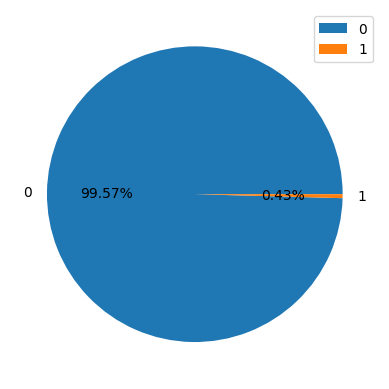

In [ ]:
plt.pie(df['is_fraud'].value_counts(),autopct='%1.2f%%',labels=[0,1])
plt.legend()

from above insight 99.61% is not fraud and remaining 0.39% is fraud.

Different Types of categories

<ipython-input-93-b5152ccfe248>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category',data=df,palette='bright')


<Axes: xlabel='category', ylabel='count'>

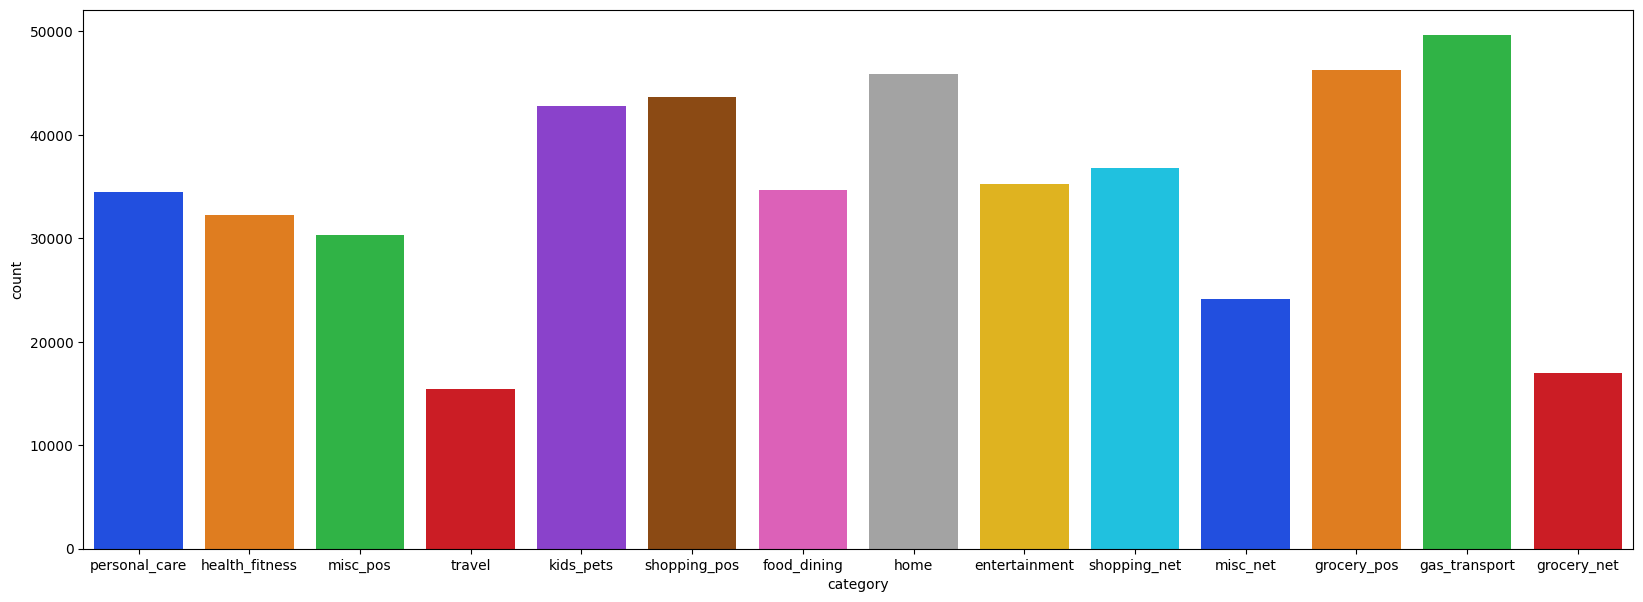

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(x='category',data=df,palette='bright')

which gender is most  is_fraud or not

<Axes: xlabel='gender', ylabel='count'>

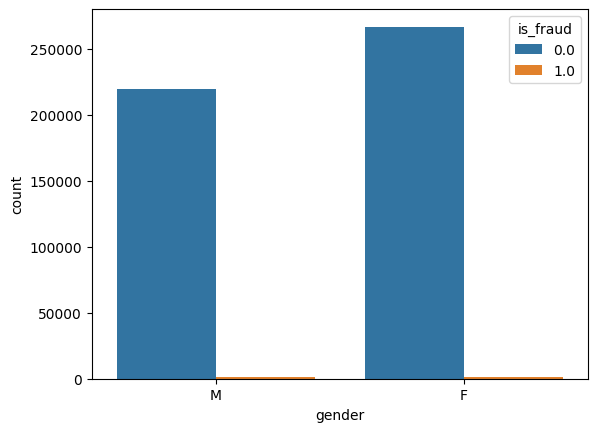

In [ ]:
sns.countplot(x='gender',hue='is_fraud',data=df)

#Heat map

<Axes: >

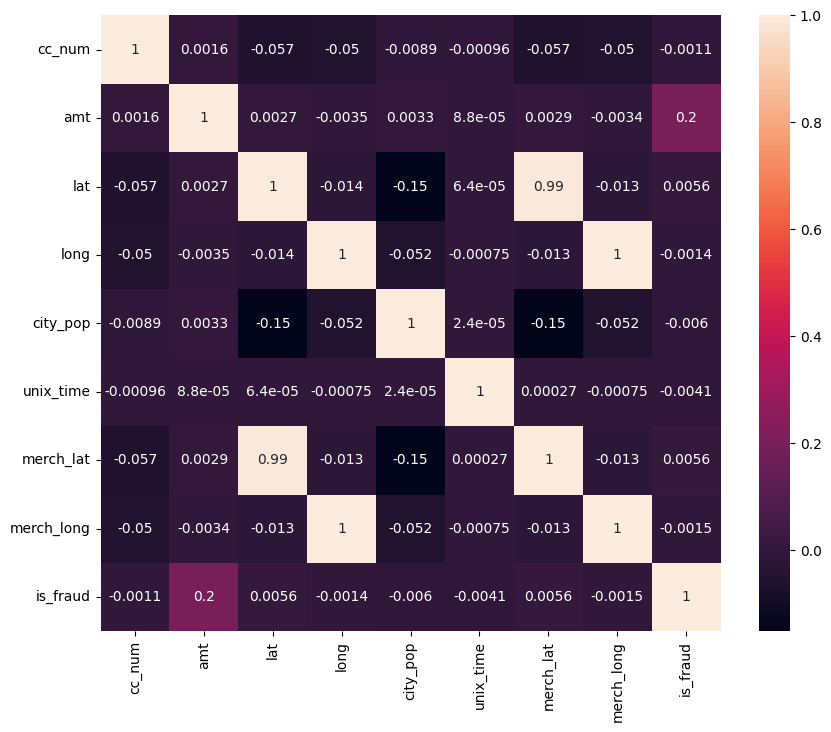

In [ ]:
d1=df.select_dtypes(include=['number'])
plt.figure(figsize=(10,8))
sns.heatmap(d1.corr(),annot=True)

In [ ]:
df.drop(['city_pop','first','last',],axis=1,inplace=True)

#Handling categorical values

converting categorical values to numerical values.label encode assigns a numerical value to each category.

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['merchant']=lab.fit_transform(df['merchant'])
df['category']=lab.fit_transform(df['category'])
df['gender']=lab.fit_transform(df['gender'])
df['city']=lab.fit_transform(df['city'])
df['street']=lab.fit_transform(df['street'])
df['trans_num']=lab.fit_transform(df['trans_num'])
df['trans_date_trans_time']=lab.fit_transform(df['trans_date_trans_time'])
df['dob']=lab.fit_transform(df['dob'])
df['job']=lab.fit_transform(df['job'])
df['state']=lab.fit_transform(df['state'])

In [ ]:
x=df.iloc[:,:-1]
x

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,lat,long,job,dob,trans_num,unix_time,merch_lat,merch_long
0,0,2.291164e+15,319,10,2.86,1,340,157,39,33.9659,-80.9355,275,375,86679,1.371817e+09,33.986391,-81.200714
1,1,3.573030e+15,591,10,29.84,0,353,16,43,40.3207,-110.4360,392,759,95526,1.371817e+09,39.450498,-109.960431
2,2,3.598215e+15,611,5,41.28,0,864,61,33,40.6729,-73.5365,259,420,381390,1.371817e+09,40.495810,-74.196111
3,3,3.591920e+15,222,9,60.05,1,319,763,8,28.5697,-80.8191,407,717,63239,1.371817e+09,28.812398,-80.883061
4,4,3.526826e+15,292,13,3.19,1,547,247,21,44.2529,-85.0170,196,177,167472,1.371817e+09,44.959148,-85.884734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488363,479289,4.969857e+15,679,6,10.15,0,263,477,17,29.9975,-90.2146,11,136,244045,1.387226e+09,30.102522,-90.597351
488364,479290,4.906629e+18,624,5,52.40,1,787,383,8,24.6557,-81.3824,460,705,191090,1.387226e+09,24.953959,-81.975268
488365,479291,3.558882e+15,314,1,123.14,1,48,591,3,35.2563,-111.9500,204,199,141316,1.387226e+09,34.847741,-111.625688
488366,479292,2.297447e+15,558,6,15.05,0,577,136,13,39.9972,-88.6962,250,237,470005,1.387226e+09,40.252381,-88.136668


In [ ]:
y=df.iloc[:,-1]
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
488363    0.0
488364    0.0
488365    0.0
488366    0.0
488367    0.0
Name: is_fraud, Length: 488368, dtype: float64

#Balancing dataset

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_resampled,y_resampled=smote.fit_resample(x,y)
y_resampled.value_counts()

is_fraud
0.0    486276
1.0    486276
Name: count, dtype: int64

In [ ]:
x1=x_resampled.values
x1

array([[ 0.00000000e+00,  2.29116393e+15,  3.19000000e+02, ...,
         1.37181686e+09,  3.39863910e+01, -8.12007140e+01],
       [ 1.00000000e+00,  3.57303004e+15,  5.91000000e+02, ...,
         1.37181687e+09,  3.94504980e+01, -1.09960431e+02],
       [ 2.00000000e+00,  3.59821529e+15,  6.11000000e+02, ...,
         1.37181689e+09,  4.04958100e+01, -7.41961110e+01],
       ...,
       [ 4.76374000e+05,  1.80040028e+14,  1.05000000e+02, ...,
         1.38714616e+09,  4.05901420e+01, -7.46664280e+01],
       [ 1.81712000e+05,  4.65849082e+15,  1.47000000e+02, ...,
         1.37738960e+09,  4.09120860e+01, -7.90486304e+01],
       [ 1.20480000e+05,  4.65387924e+15,  2.70000000e+02, ...,
         1.37551850e+09,  3.78686825e+01, -8.64330676e+01]])

In [ ]:
y1=y_resampled.values
y1

array([0., 0., 0., ..., 1., 1., 1.])

#Train test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=42)
x_train

array([[ 4.17220000e+04,  4.46203823e+18,  9.50000000e+01, ...,
         1.37308209e+09,  3.15768630e+01, -1.05630061e+02],
       [ 4.56319000e+05,  3.55484992e+15,  1.96000000e+02, ...,
         1.38681283e+09,  3.62332220e+01, -9.64386510e+01],
       [ 1.64820000e+05,  4.16975966e+15,  2.38000000e+02, ...,
         1.37685072e+09,  4.11007980e+01, -7.55755050e+01],
       ...,
       [ 1.29490000e+05,  3.42351257e+14,  5.43000000e+02, ...,
         1.37577399e+09,  3.28716280e+01, -8.40915740e+01],
       [ 3.96113000e+05,  3.58704432e+15,  2.19000000e+02, ...,
         1.38548562e+09,  3.46243784e+01, -8.93723922e+01],
       [ 1.19710000e+05,  2.57670989e+15,  4.14000000e+02, ...,
         1.37549654e+09,  3.36904120e+01, -1.17447959e+02]])

#Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

#Model creation

DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1., 1., 0., ..., 0., 1., 0.])

# perfomance evaluation

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9911470150737235
[[143982   2030]
 [   553 145201]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    146012
         1.0       0.99      1.00      0.99    145754

    accuracy                           0.99    291766
   macro avg       0.99      0.99      0.99    291766
weighted avg       0.99      0.99      0.99    291766



LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0., 1., 0., ..., 0., 1., 0.])

# perfomance evaluation

In [ ]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8815934687386467
[[138067   7945]
 [ 26602 119152]]
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89    146012
         1.0       0.94      0.82      0.87    145754

    accuracy                           0.88    291766
   macro avg       0.89      0.88      0.88    291766
weighted avg       0.89      0.88      0.88    291766

